# Imports


In [2]:
# standard imports
import numpy as np
import pandas as pd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# models
import visuals
import wine_wrangle
# split
from sklearn.model_selection import train_test_split
# stats
from scipy import stats
#warnings
import warnings
warnings.filterwarnings('ignore')

# Acquire

In [3]:
def import_dataframes(a,b):
    '''This function takes in string literal csv files a and b, 
        reads the individual csv files into a dataframe, concatinates 
        those dataframes together, and returns a single combined data frame.
        Print statements verify the combined dataframe has the same value
        counts as a+b'''
    # import red wine data set
    red = pd.read_csv(a)
    # create a columnto indicate red wine
    red['type'] = 'red'
    # import white wine data set
    white = pd.read_csv(b)
    # create a column to indicate white wine
    white['type'] = 'white'
    # concatenate the datasets
    df_combined = pd.concat([red, white])
    # write the combined dataframe to a new CSV file
    df_combined.to_csv('wine_quality_combined.csv', index=False)
    # import the combined dataset as df
    df = pd.read_csv('wine_quality_combined.csv')
    # value count of red wine data set
    a = len(red)
    print(f'Value count of the red wine dataframe: {a}')
    print('_'*50)
    # value count of white wine data set
    b = len(white)
    print(f'Value count of the white wine dataframe: {b}')
    print('_'*50)
    # value count of the combined dataset
    c = len(df)
    print(f'Value count of the combined dataframes: {c}')
    print('_'*50)
    # does the value count of the data sets combined 
    # -- equal the value count of red+white
    d = ((a+b) == c)
    if d == True:
        print(f'The value count of the combined dataframes equal the value counts of red + white: {d}')
        print('_'*50)
    else:
        print(f'The value count of the combined dataframes DOES NOT equal the value counts of red + white: {d}')
        print('_'*50)
    return df

In [4]:
df = import_dataframes('winequality-red.csv', 'winequality-white.csv')
df.head()

Value count of the red wine dataframe: 1599
__________________________________________________
Value count of the white wine dataframe: 4898
__________________________________________________
Value count of the combined dataframes: 6497
__________________________________________________
The value count of the combined dataframes equal the value counts of red + white: True
__________________________________________________


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [5]:
# summarize data/ inital glace at data
print('_'*50)
print(f'Data Frame: \n{df.sort_index().head(2).T.to_markdown()}')
print('_'*50)
print(f'Shape: \n{df.shape}')
print('_'*50)
print(f'Stats: \n{df.describe().T}')
print('_'*50)
print('Info: ')
print(df.info())
print('_'*50)
print(f'Data Types: \n{df.dtypes}')
print('_'*50)
print(f'Null Values: \n{df.isnull().sum()}')
print('_'*50)
print(f'NA Values: \n{df.isna().sum()}')
print('_'*50)
print(f'Unique Value Count: \n{df.nunique()}')
print('_'*50)
print(f'Columns: \n{df.columns}')
print('_'*50)
print(f'Column Value Counts: \n{df.columns.value_counts(dropna=False)}')
print('_'*50)

__________________________________________________
Data Frame: 
|                      | 0      | 1      |
|:---------------------|:-------|:-------|
| fixed acidity        | 7.4    | 7.8    |
| volatile acidity     | 0.7    | 0.88   |
| citric acid          | 0.0    | 0.0    |
| residual sugar       | 1.9    | 2.6    |
| chlorides            | 0.076  | 0.098  |
| free sulfur dioxide  | 11.0   | 25.0   |
| total sulfur dioxide | 34.0   | 67.0   |
| density              | 0.9978 | 0.9968 |
| pH                   | 3.51   | 3.2    |
| sulphates            | 0.56   | 0.68   |
| alcohol              | 9.4    | 9.8    |
| quality              | 5      | 5      |
| type                 | red    | red    |
__________________________________________________
Shape: 
(6497, 13)
__________________________________________________
Stats: 
                       count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidi

##### Take aways

- need to change column names into snakecase
- change quality to a float

In [6]:
def clean_data():
    # change dtype of quality column to float
    df.quality = df.quality.astype(float)
    # format column names in snake case
    df.columns = df.columns.str.replace(' ', '_')
    return df

In [7]:
df = clean_data()
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4      5.0  red  
1      9.8      5.0  red  
2      9.8      5.0  red  
3      9.8      6.0  red  
4      9.4      5.0  red

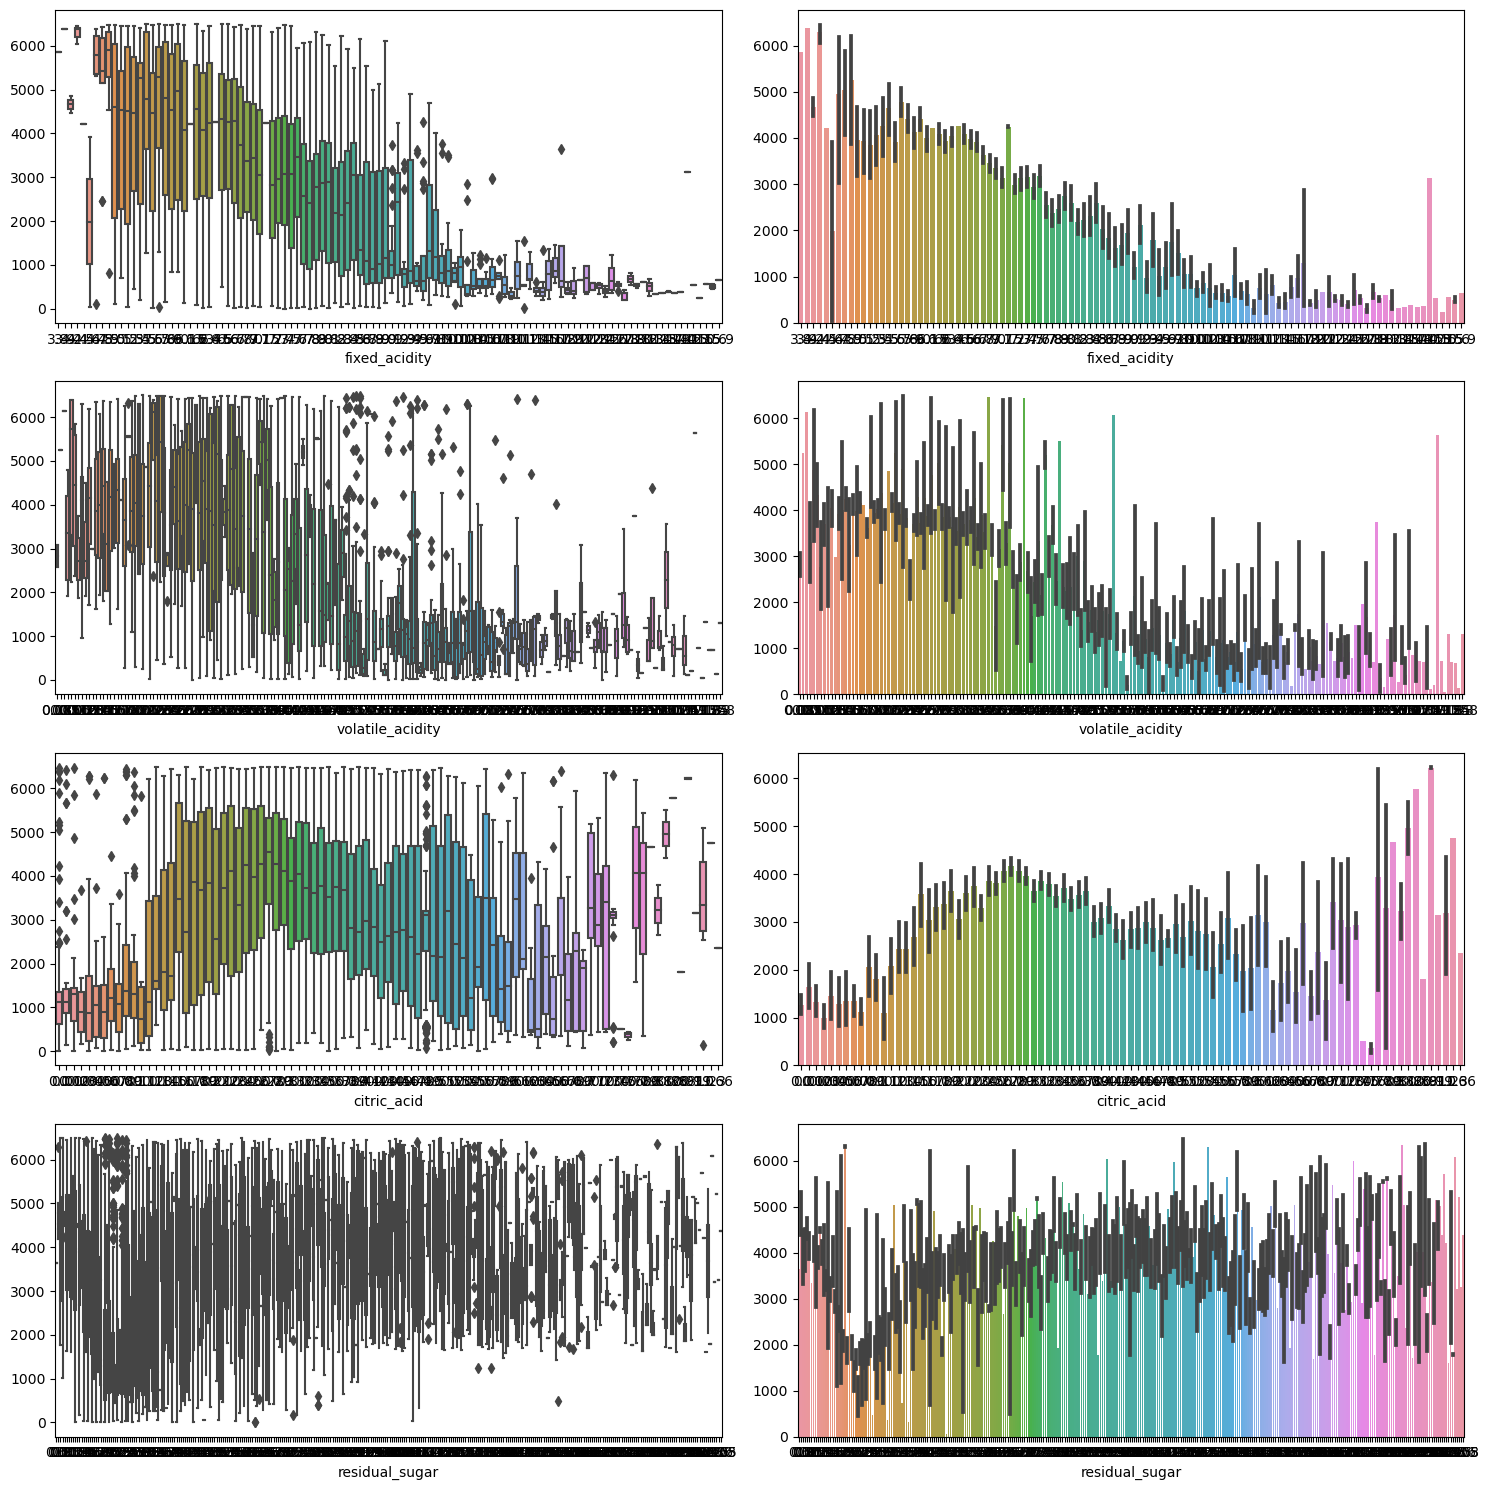

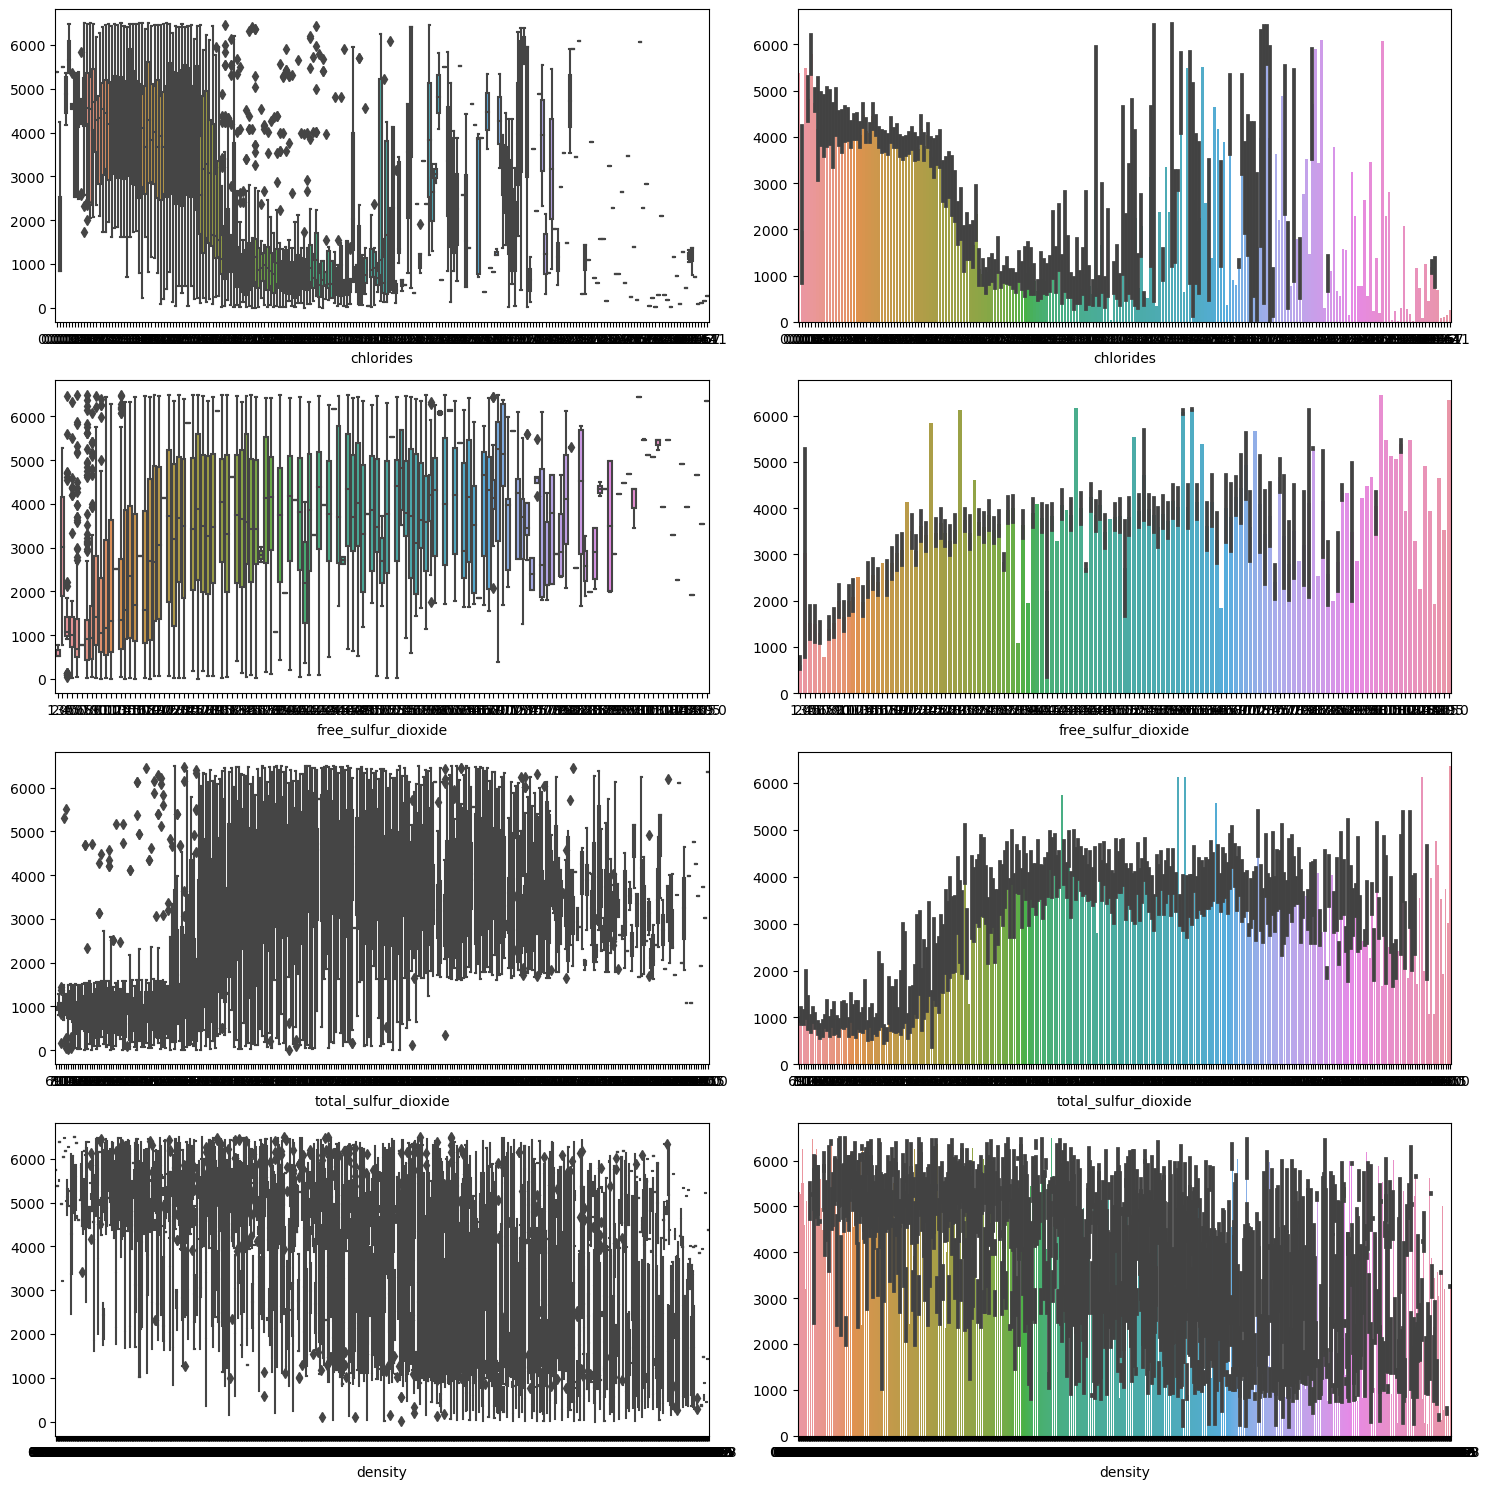

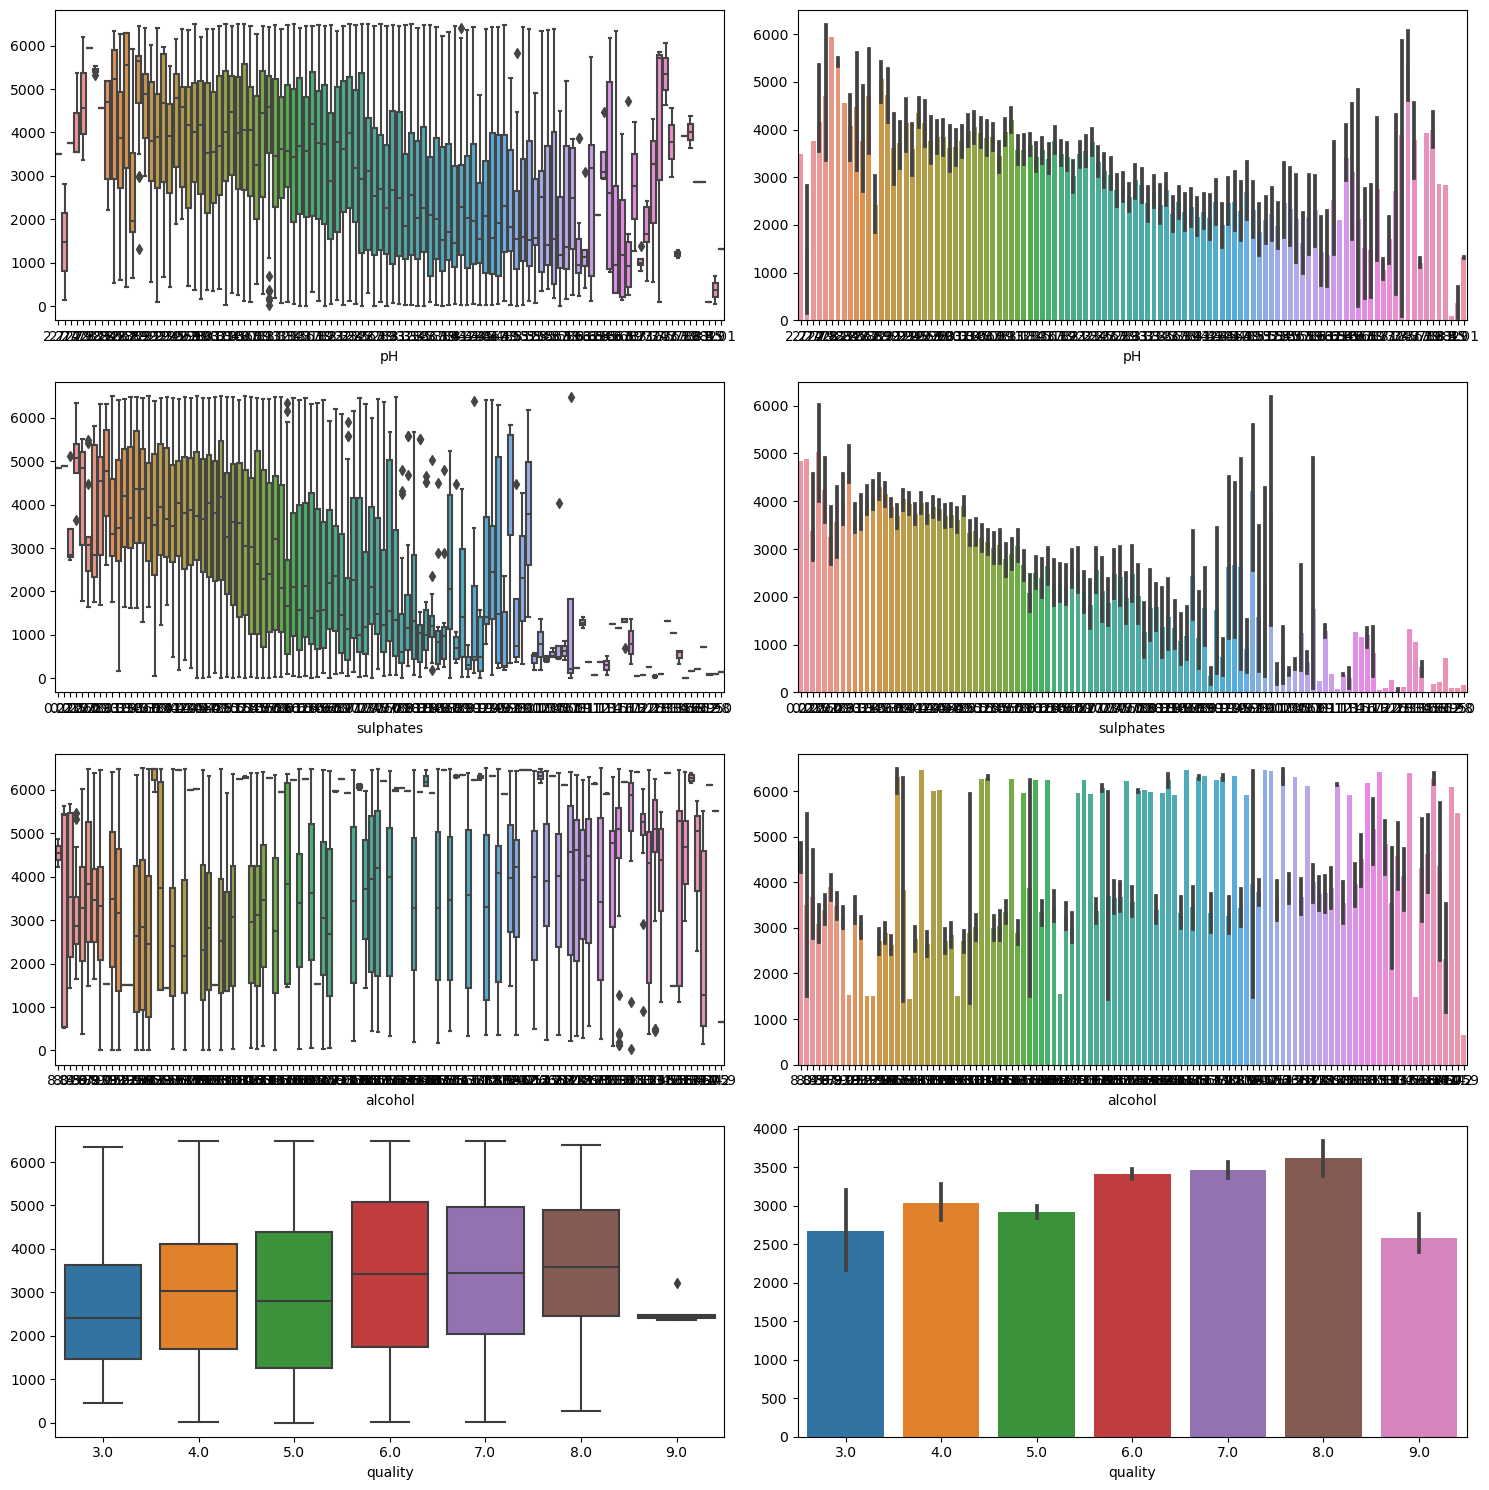

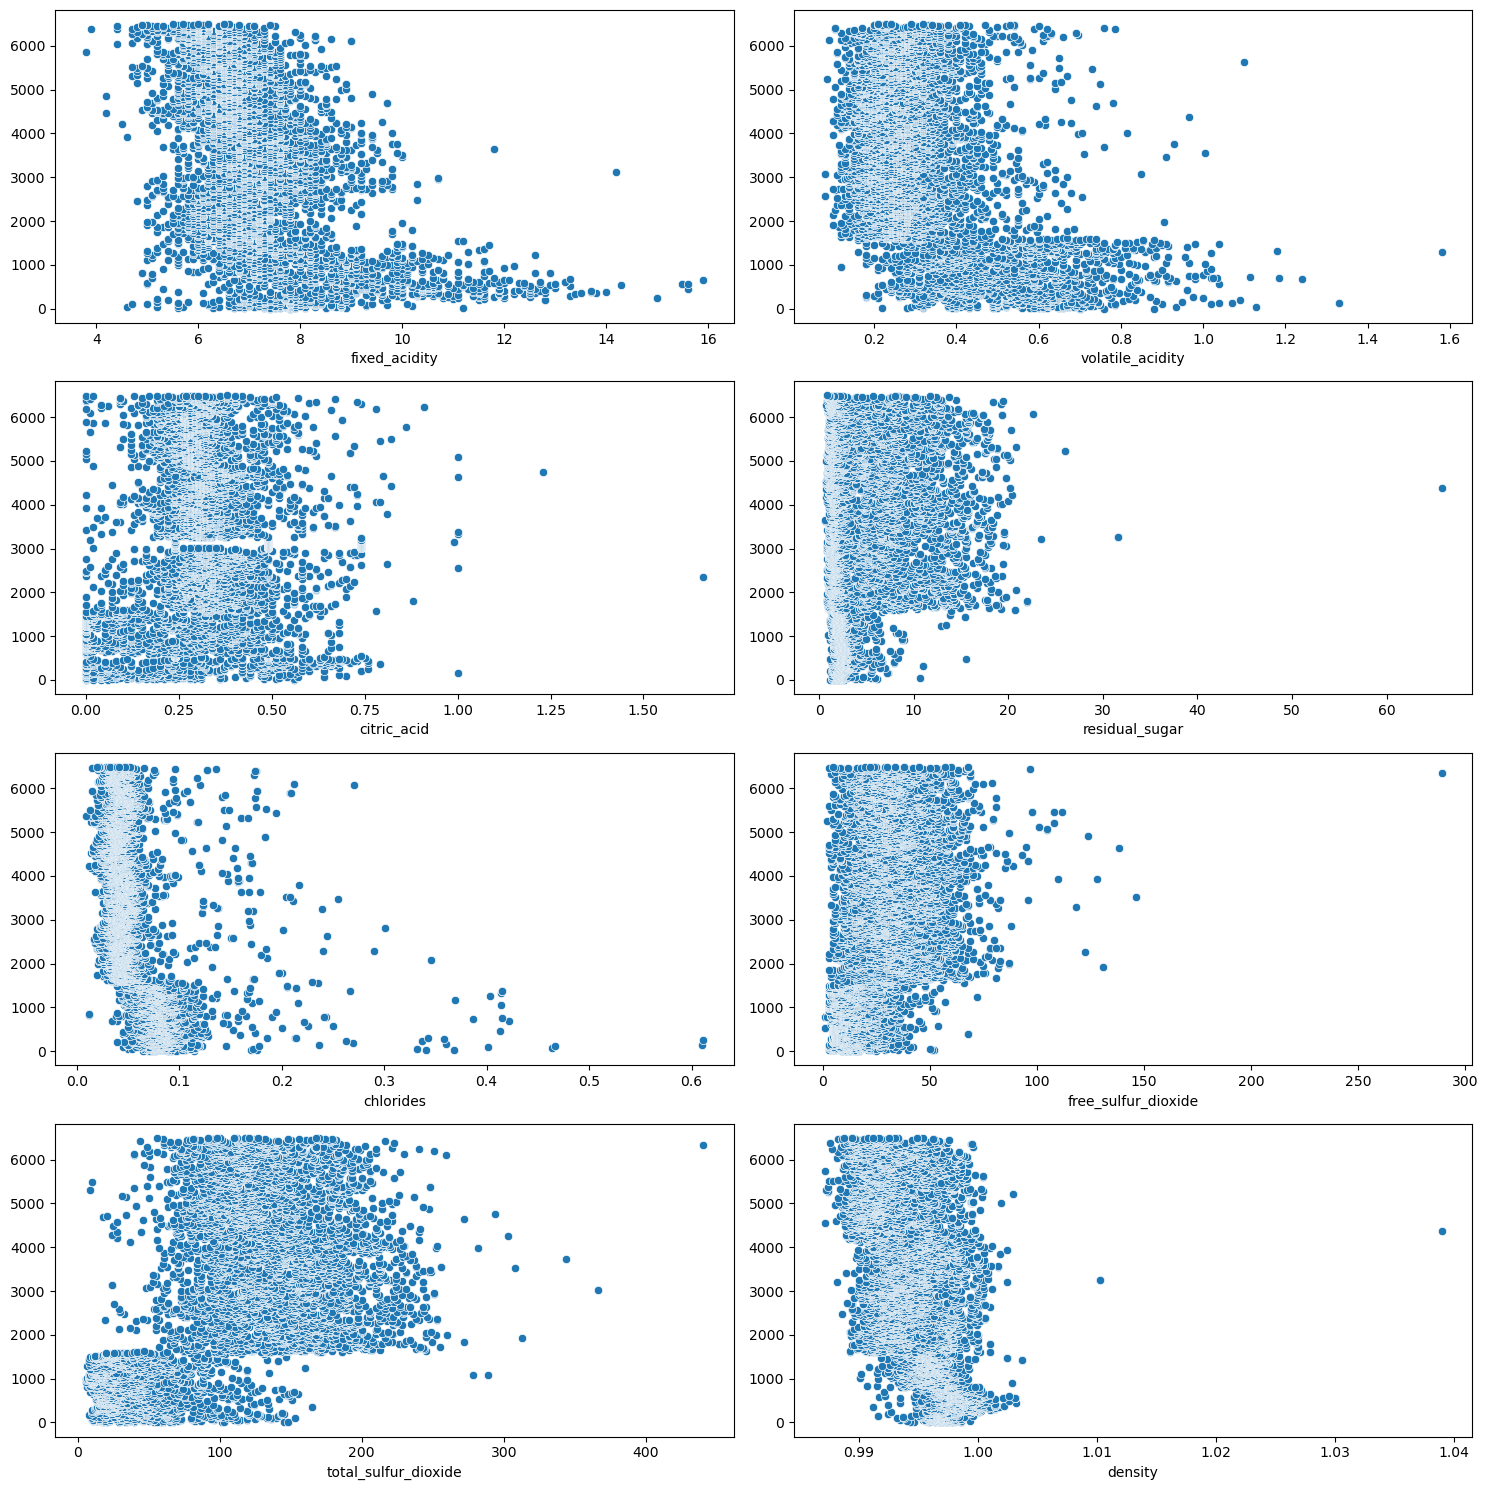

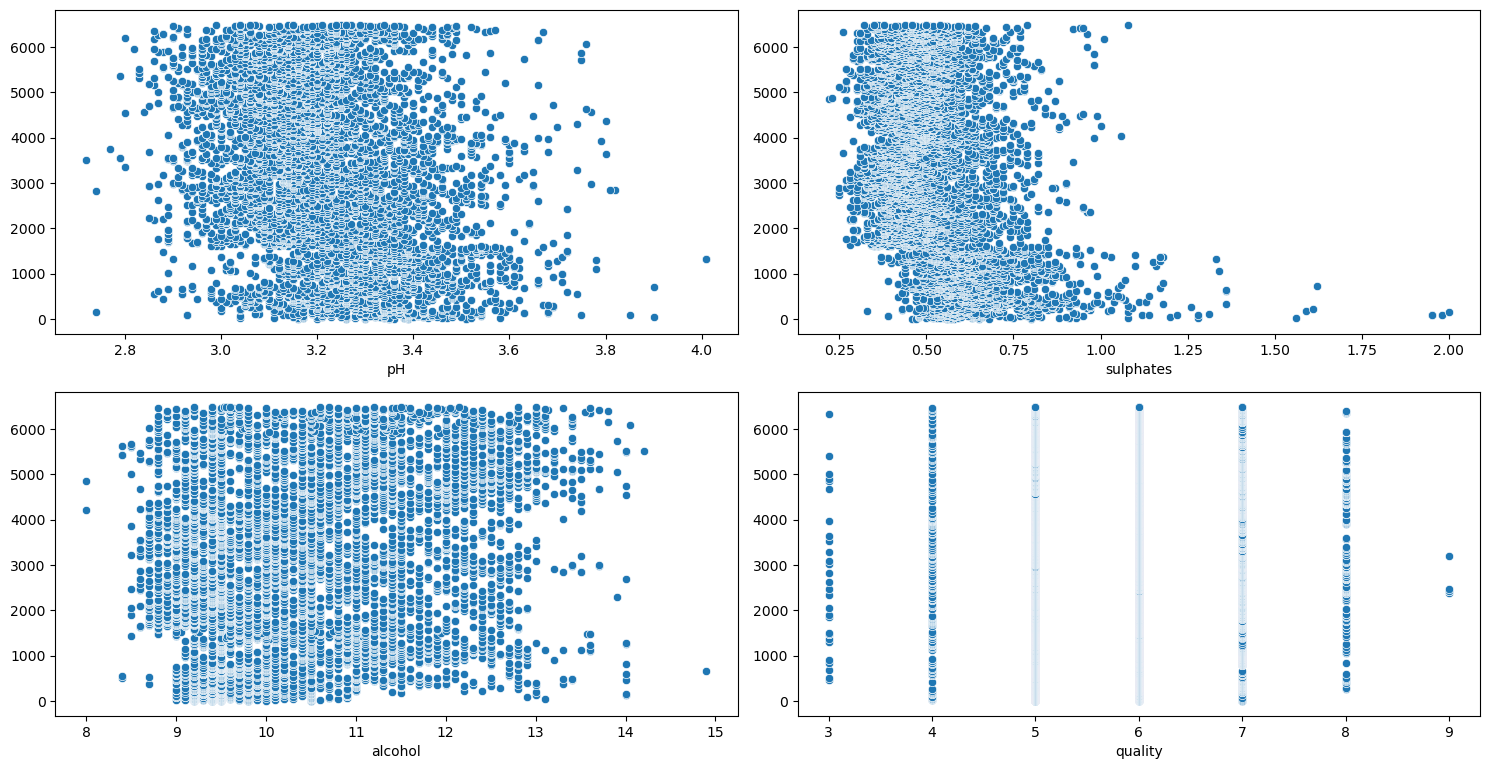

In [8]:
# first visuals of data
visuals.initial_visuals(df)

In [9]:
# train, validate, test
def split_wine(df):
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.quality)
    train, val = train_test_split(train, test_size=.30, random_state=123, stratify=train.quality)
    return train, val, test

In [10]:
train, val, test = split_wine(df)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3637 entries, 2099 to 490
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3637 non-null   float64
 1   volatile_acidity      3637 non-null   float64
 2   citric_acid           3637 non-null   float64
 3   residual_sugar        3637 non-null   float64
 4   chlorides             3637 non-null   float64
 5   free_sulfur_dioxide   3637 non-null   float64
 6   total_sulfur_dioxide  3637 non-null   float64
 7   density               3637 non-null   float64
 8   pH                    3637 non-null   float64
 9   sulphates             3637 non-null   float64
 10  alcohol               3637 non-null   float64
 11  quality               3637 non-null   float64
 12  type                  3637 non-null   object 
dtypes: float64(12), object(1)
memory usage: 397.8+ KB


In [12]:
train['quality_bins'] = pd.cut(train.quality,[0,5,7,9], labels=['low_quality', 'mid_quality', 'high_quality'])

##### Does alcohol effect quality?

H$_0$: There is no relation between alcohol and wine quality.

H$_a$: There is a relation between alcohol and wine quality.

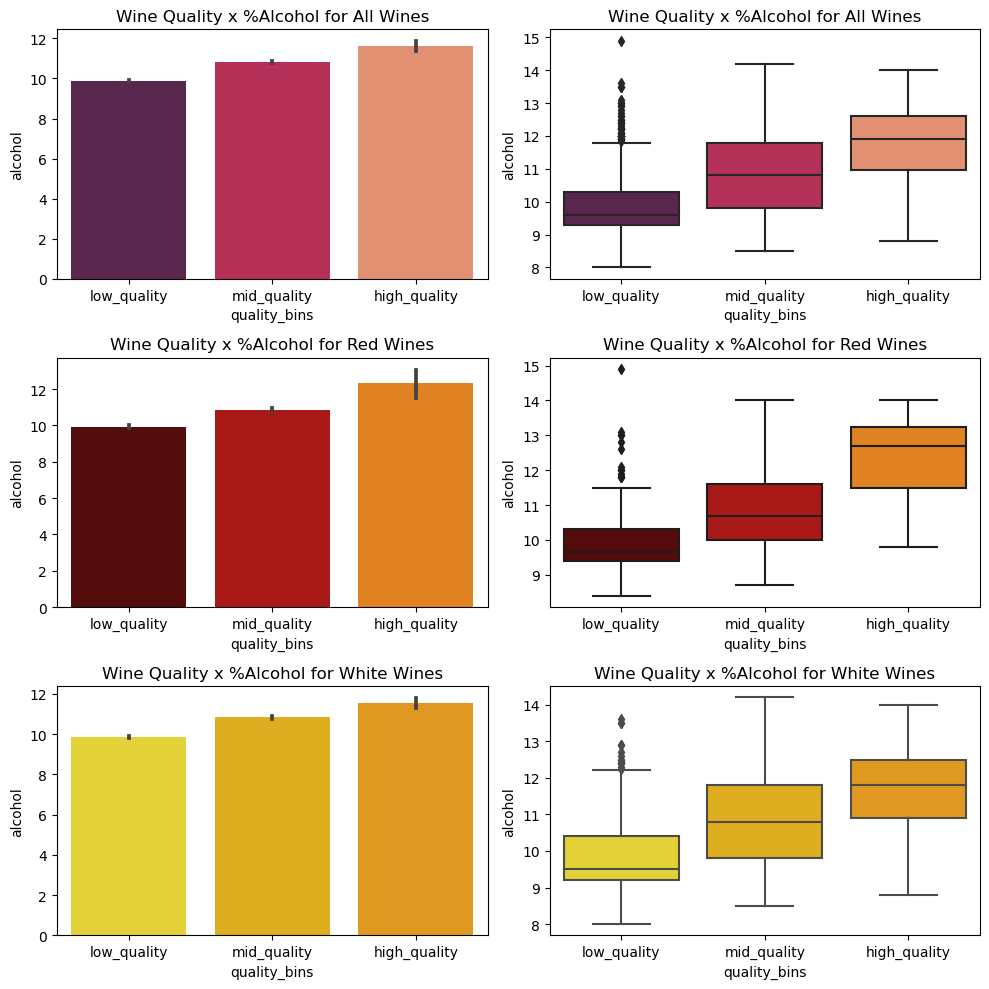

In [13]:
# quality x alcohol for all wine
plt.figure(figsize=[10,10])
plt.subplot(321)
plt.title('Wine Quality x %Alcohol for All Wines')
sns.barplot(data=train, x='quality_bins', y='alcohol', palette="rocket")
plt.subplot(322)
plt.title('Wine Quality x %Alcohol for All Wines')
sns.boxplot(data=train, x='quality_bins', y='alcohol', palette="rocket")

plt.subplot(323)
plt.title('Wine Quality x %Alcohol for Red Wines')
sns.barplot(data=train[train['type']=='red'], x='quality_bins', y='alcohol', palette='gist_heat')
plt.subplot(324)
plt.title('Wine Quality x %Alcohol for Red Wines')
sns.boxplot(data=train[train['type']=='red'], x='quality_bins', y='alcohol', palette='gist_heat')

plt.subplot(325)
plt.title('Wine Quality x %Alcohol for White Wines')
sns.barplot(data=train[train['type']=='white'], x='quality_bins', y='alcohol', palette='Wistia')
plt.subplot(326)
plt.title('Wine Quality x %Alcohol for White Wines')
sns.boxplot(data=train[train['type']=='white'], x='quality_bins', y='alcohol', palette='Wistia')
plt.tight_layout()
plt.show()

##### Take aways
- outliers in low quality.
- High quality wine tends to contain more alcohol

In [14]:
# create cross table of wine quality and alc bins
observed = pd.crosstab(train.quality_bins, train.alcohol)

# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

# set alpha
α = 0.05

# hypothesis test for wine quality and % alcohol
if p < α:
    print(f'We reject the null hypothesis. With p value: {p:.4f}, there is enough evidence to support a statistical relationship between wine quality and percent alcohol.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p:.4f}, this is not enough evidence to support a statistical relationship between wine quality and percent alcohol')

We reject the null hypothesis. With p value: 0.0000, there is enough evidence to support a statistical relationship between wine quality and percent alcohol.


In [15]:
# hypothesis test for red wine quality and % alcohol
# create cross tab
observed2 = pd.crosstab(train[train['type']=='red'].quality_bins, train[train['type']=='red'].alcohol)
# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed2)
# hypothesis statement
if p < α:
    print(f'We reject the null hypothesis. With p value: {p:.4f}, there is enough evidence to support a statistical relationship between red wine quality and percent alcohol.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p:.4f}, this is not enough evidence to support a statistical relationship between red wine quality and percent alcohol')

We reject the null hypothesis. With p value: 0.0000, there is enough evidence to support a statistical relationship between red wine quality and percent alcohol.


In [16]:
#hypothesis test for white wine and % alcohol
# create crosstab
observed3 = pd.crosstab(train[train['type']=='white'].quality_bins, train[train['type']=='white'].alcohol)
# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed3)
# hypothesis statement
if p < α:
    print(f'We reject the null hypothesis. With p value: {p:.4f}, there is enough evidence to support a statistical relationship between white wine quality and percent alcohol.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p:.4f}, this is not enough evidence to support a statistical relationship between white wine quality and percent alcohol')

We reject the null hypothesis. With p value: 0.0000, there is enough evidence to support a statistical relationship between white wine quality and percent alcohol.


##### Take aways

% alcohol is a significant trait of wine quality. Specifically it is a significant trait for both red and white wine quality.

##### How does residual sugar affect quality?

H$_0$: There is no relation between residual sugar and wine quality.

H$_a$: There is a relation between residual sugar and wine quality.

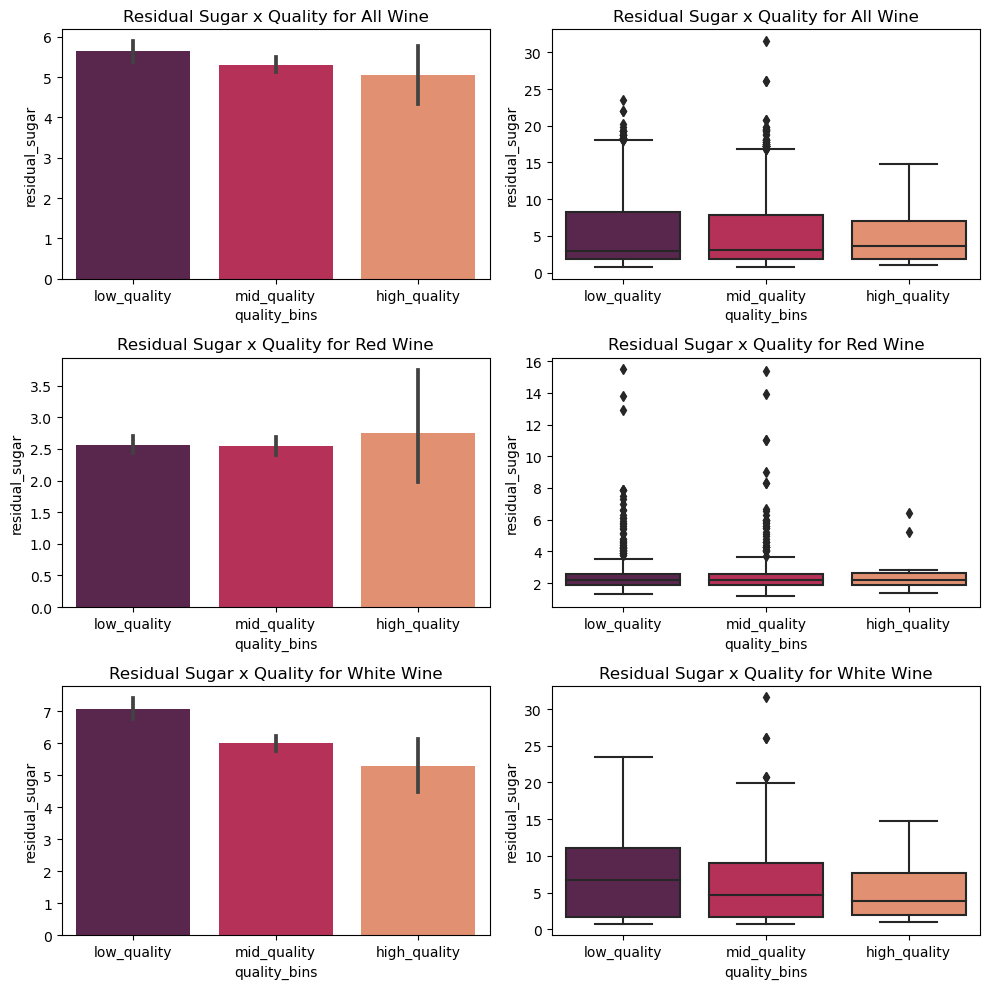

In [17]:
plt.figure(figsize=[10,10])
plt.subplot(321)
plt.title('Residual Sugar x Quality for All Wine')
sns.barplot(data=train, x='quality_bins', y='residual_sugar', palette="rocket")
plt.subplot(322)
plt.title('Residual Sugar x Quality for All Wine')
sns.boxplot(data=train, x='quality_bins', y='residual_sugar', palette="rocket")

plt.subplot(323)
plt.title('Residual Sugar x Quality for Red Wine')
sns.barplot(data=train[train['type']=='red'], x='quality_bins', y='residual_sugar', palette="rocket")
plt.subplot(324)
plt.title('Residual Sugar x Quality for Red Wine')
sns.boxplot(data=train[train['type']=='red'], x='quality_bins', y='residual_sugar', palette="rocket")

plt.subplot(325)
plt.title('Residual Sugar x Quality for White Wine')
sns.barplot(data=train[train['type']=='white'], x='quality_bins', y='residual_sugar', palette="rocket")
plt.subplot(326)
plt.title('Residual Sugar x Quality for White Wine')
sns.boxplot(data=train[train['type']=='white'], x='quality_bins', y='residual_sugar', palette="rocket")
plt.tight_layout()
plt.show()

##### Take aways
- lots of outliers
- high quality wines tend to have lower levels of residual sugar, while low quality wines have higher levels of residual sugar
- Something is going on with red wine.
    - Why so many outliers?

In [18]:
# identify residual sugar range
print(f' Min Residual Sugar Value: {train.residual_sugar.min()}')
print(f' Max Residual Sugar Value: {train.residual_sugar.max()}')

 Min Residual Sugar Value: 0.7
 Max Residual Sugar Value: 31.6


In [19]:
# bin residual sugar for classification use
train['rs_bins'] = pd.cut(train.residual_sugar,[0,20,40,60,80]
                           , labels=['under_20'
                                     , '20_to_40_including40'
                                     , '40_to_60_including60'
                                     , '60_to_80_including80'])
#train.head()

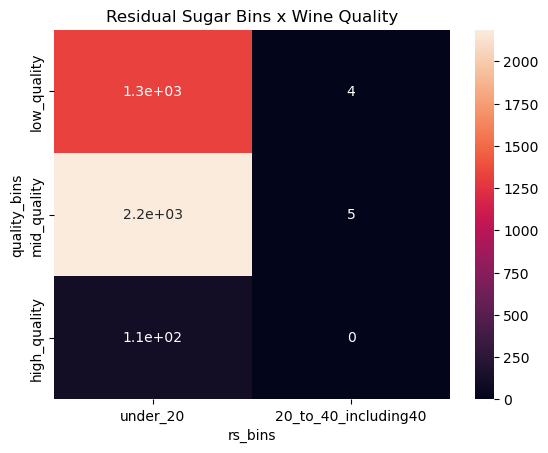

In [22]:
# create cross tab of residual sugar bins against wine quality bins
observed = pd.crosstab(train.quality_bins, train.rs_bins)
# create heatmap of residual sugar bins against wine quality bins
plt.title('Residual Sugar Bins x Wine Quality')
sns.heatmap(data=observed, annot=True)
plt.show()

##### Take aways

I binned residual sugar data into 'under_20', '20_to_40_including40', '40_to_60_including60', '60_to_80_including80'. 

I then crosstabed these bins against wine quality, and created a heat map. 

The heatmap showed 10 values out of more than 3500 values, were greater than 20. Because of the insignificant amount of residual sugar values above 20, I decided to drop those values from the dataset.

Curious if those high residual sugar values have a relation to the type of wine and it's quality?

In [23]:
def remove_high_rs(df):
    '''This function removes values with residual sugar values above 20'''
    mask = df['residual_sugar'] <= 20
    df = df[mask]
    return df
# reassign train to remove values with residual sugar values above 20
train = remove_high_rs(train)
# identify residual sugar range
print(f' Min Residual Sugar Value: {train.residual_sugar.min()}')
print(f' Max Residual Sugar Value: {train.residual_sugar.max()}')

 Min Residual Sugar Value: 0.7
 Max Residual Sugar Value: 19.9


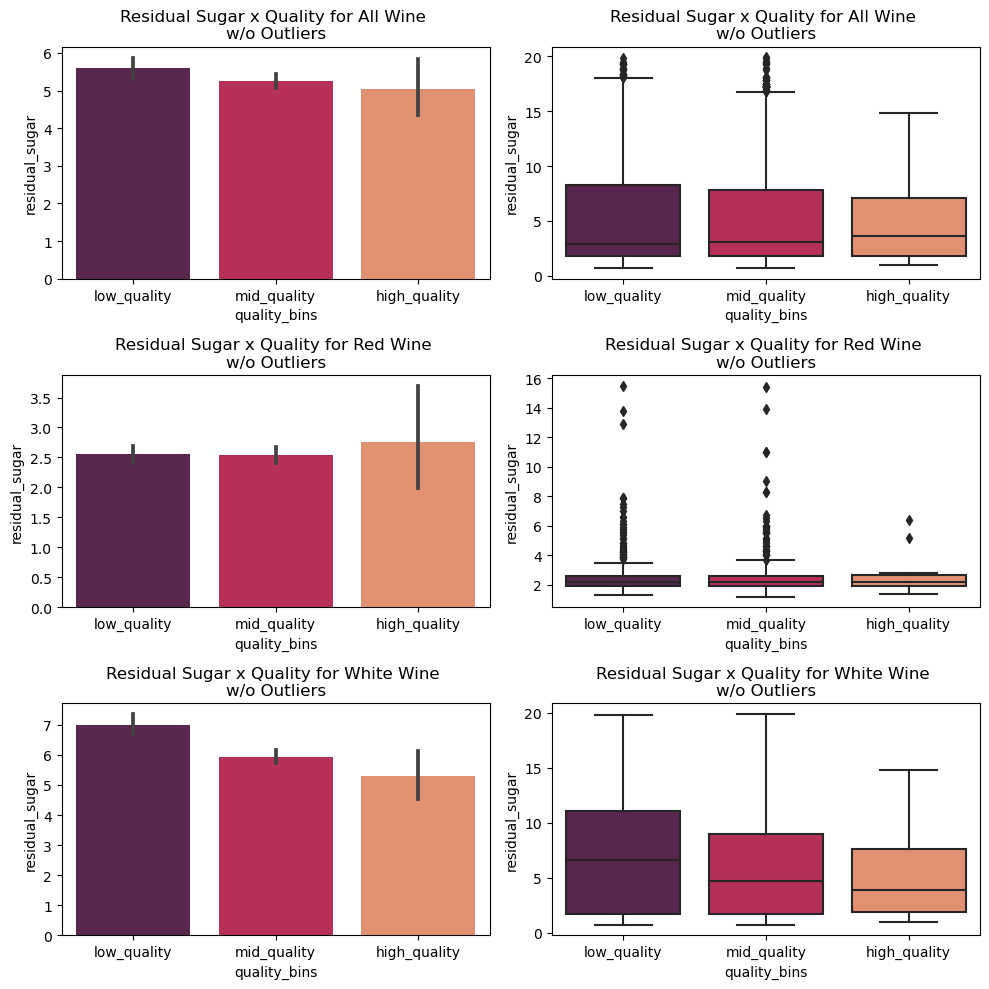

In [25]:
# after outliers
plt.figure(figsize=[10,10])
plt.subplot(321)
plt.title('Residual Sugar x Quality for All Wine \nw/o Outliers')
sns.barplot(data=train, x='quality_bins', y='residual_sugar', palette="rocket")
plt.subplot(322)
plt.title('Residual Sugar x Quality for All Wine \nw/o Outliers')
sns.boxplot(data=train, x='quality_bins', y='residual_sugar', palette="rocket")

plt.subplot(323)
plt.title('Residual Sugar x Quality for Red Wine \nw/o Outliers')
sns.barplot(data=train[train['type']=='red'], x='quality_bins', y='residual_sugar', palette="rocket")
plt.subplot(324)
plt.title('Residual Sugar x Quality for Red Wine \nw/o Outliers')
sns.boxplot(data=train[train['type']=='red'], x='quality_bins', y='residual_sugar', palette="rocket")

plt.subplot(325)
plt.title('Residual Sugar x Quality for White Wine \nw/o Outliers')
sns.barplot(data=train[train['type']=='white'], x='quality_bins', y='residual_sugar', palette="rocket")
plt.subplot(326)
plt.title('Residual Sugar x Quality for White Wine \nw/o Outliers')
sns.boxplot(data=train[train['type']=='white'], x='quality_bins', y='residual_sugar', palette="rocket")
plt.tight_layout()
plt.show()

In [26]:
# bin residual sugar for classification use
train['rs_bins2'] = pd.cut(train.residual_sugar,[0,5,10,15,20]
                           , labels=['5_and_under'
                                     , '5_to_10'
                                     , '10_to_15'
                                     , '15_to_20'])

In [27]:
# create cross tab of residual sugar bins against wine quality bins
observed_all = pd.crosstab(train.quality_bins, train.rs_bins2)
# set alpha
α = 0.05
# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed_all)
# hypothesis statement
if p < α:
    print(f'We reject the null hypothesis. With p value: {p:.4f}, there is enough evidence to support a statistical relationship between wine quality and residual sugar.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p:.4f}, this is not enough evidence to support a statistical relationship between wine quality and residual sugar')

We reject the null hypothesis. With p value: 0.0043, there is enough evidence to support a statistical relationship between wine quality and residual sugar.


In [29]:
# hypothesis test for red wine quality x residual sugar
# red wine cross tab
observed_red = pd.crosstab(train[train['type']=='red'].quality_bins, train[train['type']=='red'].rs_bins2)
# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed_red)
# hypothesis statement
if p < α:
    print(f'We reject the null hypothesis. With p value: {p:.4f}, there is enough evidence to support a statistical relationship between red wine quality and residual sugar.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p:.4f}, this is not enough evidence to support a statistical relationship between red wine quality and residual sugar')

We fail to reject the null hypothesis. With p value: 0.5223, this is not enough evidence to support a statistical relationship between red wine quality and residual sugar


In [30]:
# white wine crosstab
observed_w = pd.crosstab(train[train['type']=='white'].quality_bins, train[train['type']=='white'].rs_bins2)
# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed_w)
# hypothesis statement
if p < α:
    print(f'We reject the null hypothesis. With p value: {p:.4f}, there is enough evidence to support a statistical relationship between white wine quality and residual sugar.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p:.4f}, this is not enough evidence to support a statistical relationship between white wine quality and residual sugar')

We reject the null hypothesis. With p value: 0.0000, there is enough evidence to support a statistical relationship between white wine quality and residual sugar.


##### Take aways
Wine in general has a significant relationship between quality and residual sugar. White wine also has a significant relationship to quality and residual sugar, however red wine does not.

##### How does pH and free sulfur dioxide relate to quality?

H$_0$: There is no relation between pH, sulfer dioxide and wine quality.

H$_a$: There is a relation between pH, sulfer dioxide and wine quality.

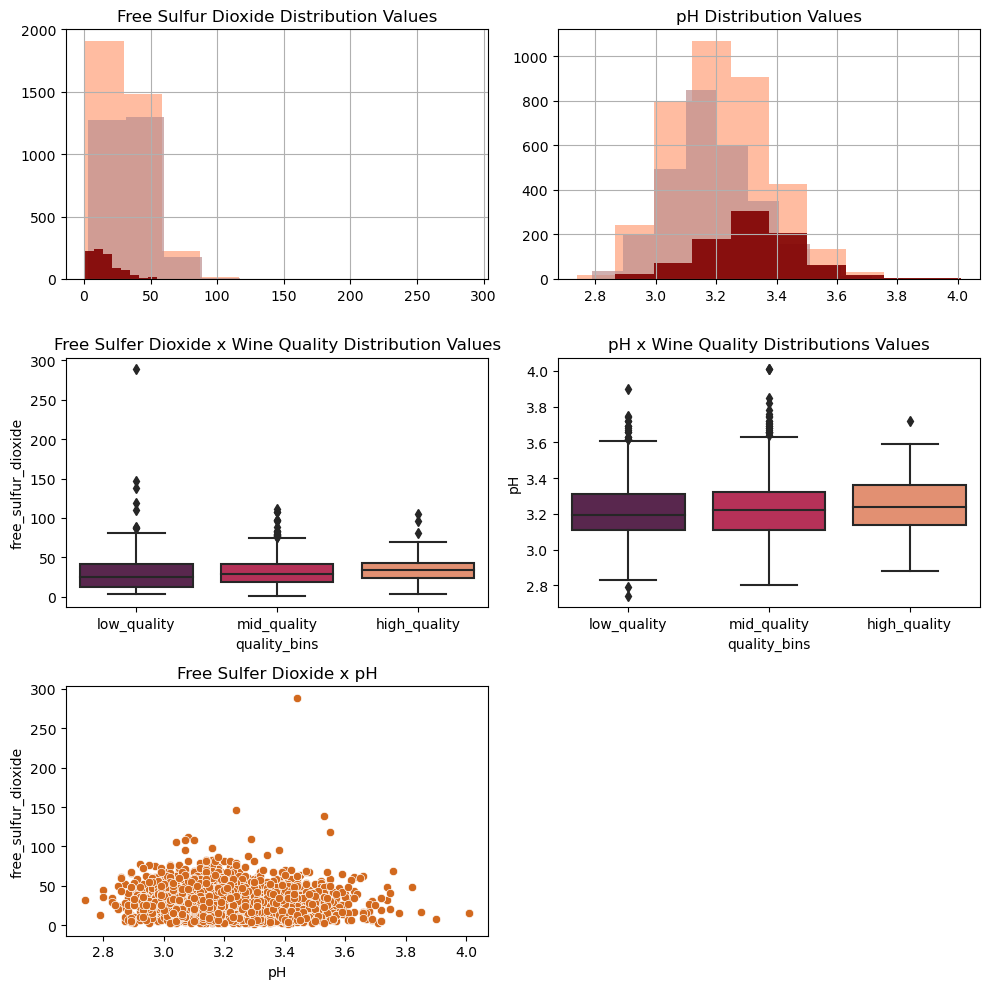

Free Sulfur Dioxide Min Value: 1.0
Free Sulfur Dioxide Max Value: 289.0
--------------------------------------------------
pH Min Value: 2.74
pH Max Value: 4.01


In [33]:
plt.figure(figsize=[10,10])
plt.subplot(321)
plt.title('Free Sulfur Dioxide Distribution Values')
train.free_sulfur_dioxide.hist(color='lightsalmon', alpha = 0.7)
plt.subplot(321)
train[train['type']== 'white'].free_sulfur_dioxide.hist(color='rosybrown', alpha = 0.7)
plt.subplot(321)
train[train['type']== 'red'].free_sulfur_dioxide.hist(color='maroon', alpha = 0.9)
plt.subplot(322)
plt.title('pH Distribution Values')
train.pH.hist(color='lightsalmon', alpha = 0.7)
plt.subplot(322)
train[train['type']== 'white'].pH.hist(color='rosybrown', alpha = 0.7)
plt.subplot(322)
train[train['type']== 'red'].pH.hist(color='maroon', alpha = 0.9)
plt.subplot(323)
plt.title('Free Sulfer Dioxide x Wine Quality Distribution Values')
sns.boxplot(data=train, x='quality_bins', y='free_sulfur_dioxide', palette='rocket')
plt.subplot(324)
plt.title('pH x Wine Quality Distributions Values')
sns.boxplot(data=train, x='quality_bins', y='pH', palette='rocket')
plt.subplot(325)
plt.title('Free Sulfer Dioxide x pH')
sns.scatterplot(data=train, x='pH', y='free_sulfur_dioxide', color='chocolate')
plt.tight_layout()
plt.show()

# min and max values for free sulfur dioxide and pH
print(f'Free Sulfur Dioxide Min Value: {train.free_sulfur_dioxide.min()}')
print(f'Free Sulfur Dioxide Max Value: {train.free_sulfur_dioxide.max()}')
print('-'*50)
print(f'pH Min Value: {train.pH.min()}')
print(f'pH Max Value: {train.pH.max()}')

In [34]:
# view the largest values for free sulfur dioxide
# determine if the outlier can be dropped
train.sort_values(by='free_sulfur_dioxide',ascending=False).head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
6344            6.1             0.260         0.25             2.9      0.047   
3530            7.1             0.490         0.22             2.0      0.047   
4649            6.2             0.255         0.24             1.7      0.039   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
6344                289.0                 440.0  0.99314  3.44       0.64   
3530                146.5                 307.5  0.99240  3.24       0.37   
4649                138.5                 272.0  0.99452  3.53       0.53   

      alcohol  quality   type quality_bins   rs_bins     rs_bins2  
6344     10.5      3.0  white  low_quality  under_20  5_and_under  
3530     11.0      3.0  white  low_quality  under_20  5_and_under  
4649      9.6      4.0  white  low_quality  under_20  5_and_under

##### Take aways
There is only one free_sulfur_dioxide value above 150 at 289. I will treat this as an outlier and will remove this value from the dataset.

In [35]:
def remove_high_sd(df):
    '''This function removes free sulfur dioxide values above 150'''
    mask = df['free_sulfur_dioxide'] < 150
    df = df[mask]
    return df

# reassign train to remove outlier
train = remove_high_sd(train)

# verify outlier has been dropped
train.sort_values(by='free_sulfur_dioxide',ascending=False).head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3530            7.1             0.490         0.22            2.00      0.047   
4649            6.2             0.255         0.24            1.70      0.039   
3287            6.7             0.250         0.26            1.55      0.041   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
3530                146.5                 307.5  0.99240  3.24       0.37   
4649                138.5                 272.0  0.99452  3.53       0.53   
3287                118.5                 216.0  0.99490  3.55       0.63   

      alcohol  quality   type quality_bins   rs_bins     rs_bins2  
3530     11.0      3.0  white  low_quality  under_20  5_and_under  
4649      9.6      4.0  white  low_quality  under_20  5_and_under  
3287      9.4      3.0  white  low_quality  under_20  5_and_under

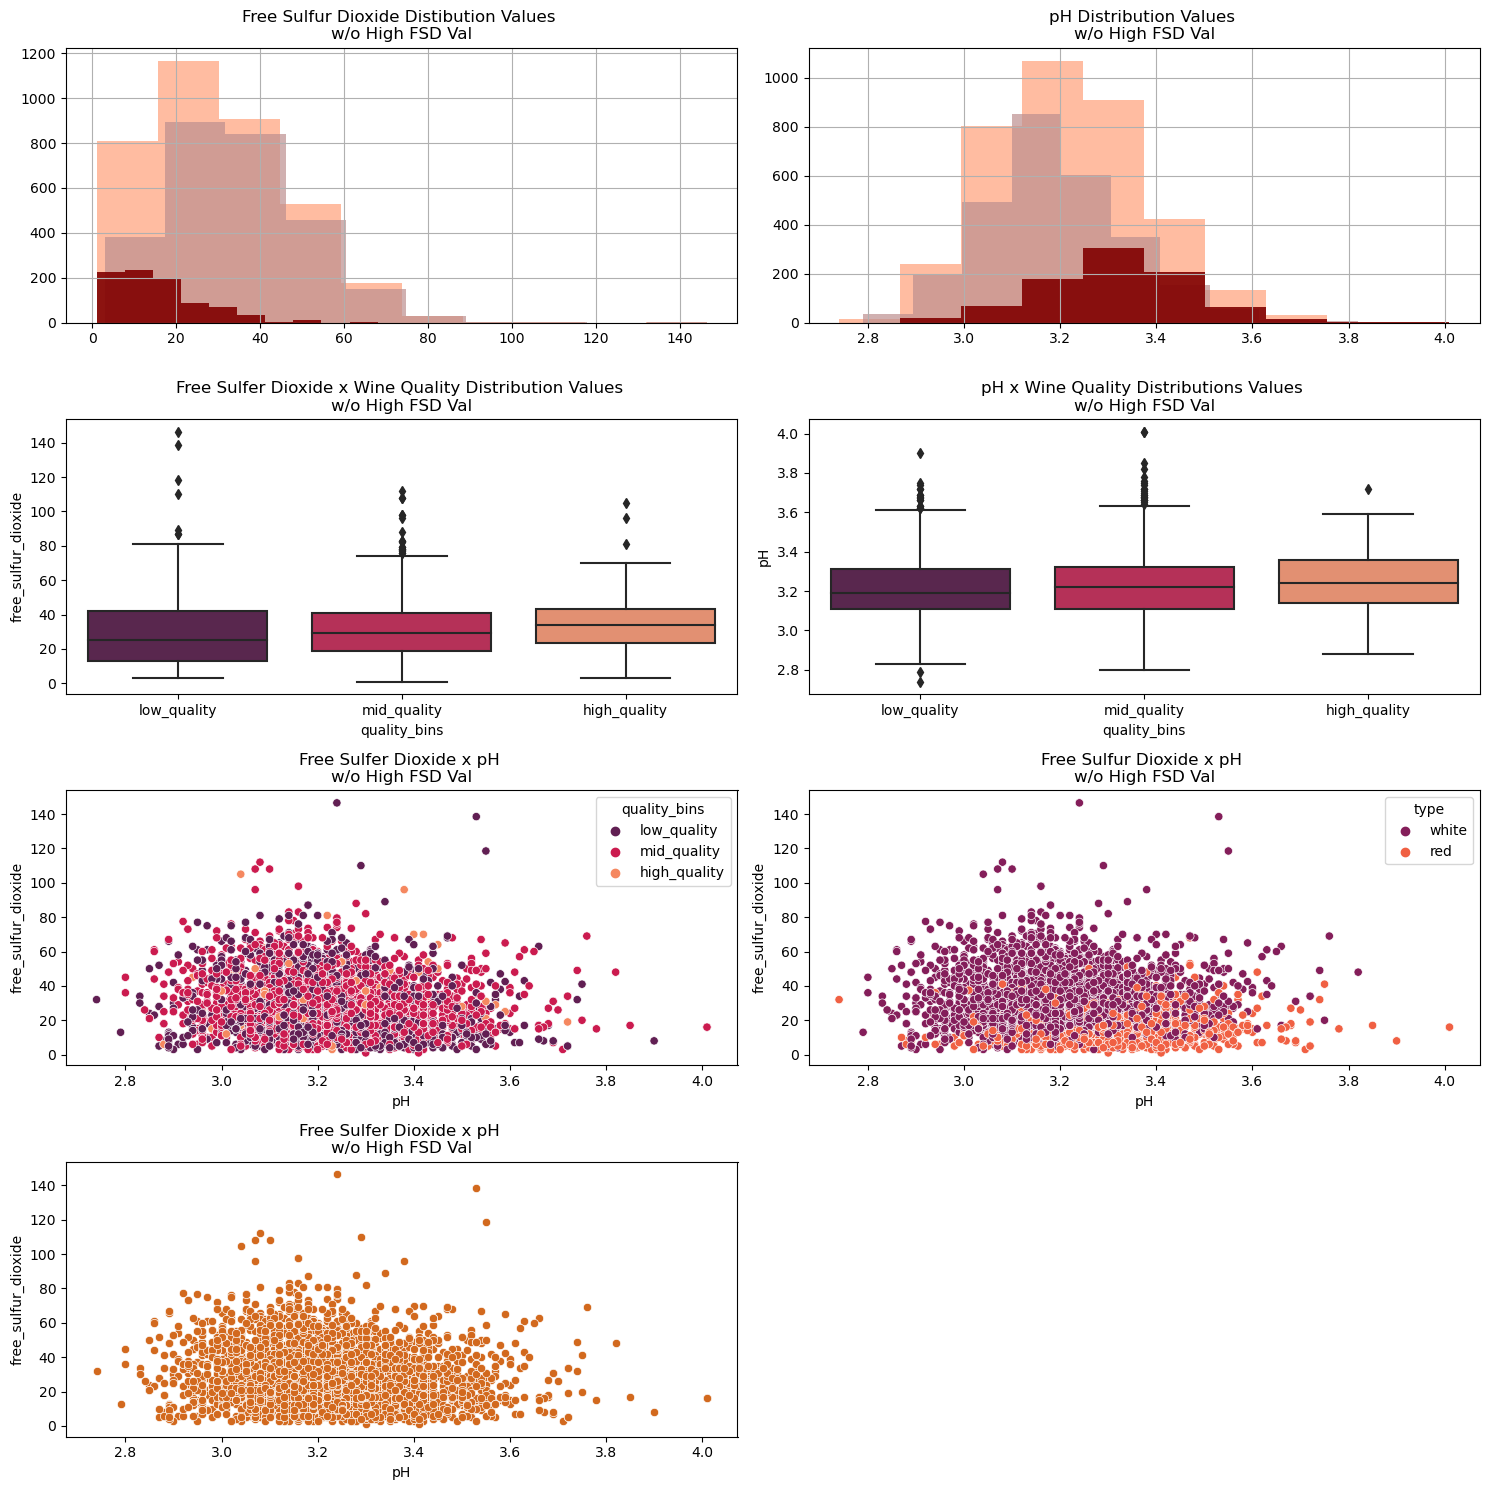

Free Sulfur Dioxide Min Value: 1.0
Free Sulfur Dioxide Max Value: 146.5
--------------------------------------------------
pH Min Value: 2.74
pH Max Value: 4.01


In [41]:
# after the free sulfur dioxide outlier has been removed
plt.figure(figsize=[15,15])
plt.subplot(421)
plt.title('Free Sulfur Dioxide Distibution Values \nw/o High FSD Val')
train.free_sulfur_dioxide.hist(color='lightsalmon', alpha = 0.7)
plt.subplot(421)
train[train['type']== 'white'].free_sulfur_dioxide.hist(color='rosybrown', alpha = 0.7)
plt.subplot(421)
train[train['type']== 'red'].free_sulfur_dioxide.hist(color='maroon', alpha = 0.9)
plt.subplot(422)
plt.title('pH Distribution Values \nw/o High FSD Val')
train.pH.hist(color='lightsalmon', alpha = 0.7)
plt.subplot(422)
train[train['type']== 'white'].pH.hist(color='rosybrown', alpha = 0.7)
plt.subplot(422)
train[train['type']== 'red'].pH.hist(color='maroon', alpha = 0.9)
plt.subplot(423)
plt.title('Free Sulfer Dioxide x Wine Quality Distribution Values \nw/o High FSD Val')
sns.boxplot(data=train, x='quality_bins', y='free_sulfur_dioxide', palette='rocket')
plt.subplot(424)
plt.title('pH x Wine Quality Distributions Values \nw/o High FSD Val')
sns.boxplot(data=train, x='quality_bins', y='pH', palette='rocket')
plt.subplot(425)
plt.title('Free Sulfer Dioxide x pH \nw/o High FSD Val')
sns.scatterplot(data=train, x='pH', y='free_sulfur_dioxide', hue='quality_bins', palette='rocket')
plt.subplot(426)
plt.title('Free Sulfur Dioxide x pH \nw/o High FSD Val')
sns.scatterplot(data=train, x='pH', y='free_sulfur_dioxide', hue='type', palette='rocket')
plt.subplot(427)
plt.title('Free Sulfer Dioxide x pH \nw/o High FSD Val')
sns.scatterplot(data=train, x='pH', y='free_sulfur_dioxide', color='chocolate')
plt.tight_layout()
plt.show()

# min and max values for free sulfur dioxide and pH
print(f'Free Sulfur Dioxide Min Value: {train.free_sulfur_dioxide.min()}')
print(f'Free Sulfur Dioxide Max Value: {train.free_sulfur_dioxide.max()}')
print('-'*50)
print(f'pH Min Value: {train.pH.min()}')
print(f'pH Max Value: {train.pH.max()}')

##### Take aways
- Free sulfur dioxide seems to have right skew
- pH look approx. normal
    - red wine seems to have the largest mean pH, white wine the smallest
- lots of outliers outliers
- White wine appears to have a greater free sulfur dioxide value
- Red wine appears to have a smaller free sulfur dioxide value and possibly a larger pH
- It looks like high quality wine tends to have a larger pH and lower sulfer dioxide distribution than mid and low quality wine.
- Low quality wine seems to vary more in free sulfur dioxide while mid quality wine seems to vary more in pH

In [42]:
def remove_outliers(df):
    '''This function removes outliers from specified columns using interquartile range'''
    columns = ["free_sulfur_dioxide"
               , "pH"]
    for col in columns:
    # setting floor for my data
        Q1 = df[col].quantile(0.25)
    # setting ceiling for my data
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        floor = Q1 - 1.5 * IQR
        ceiling = Q3 + 1.5 * IQR
        df = df.loc[(df[col] >= floor) & (df[col] <= ceiling)]
    return df
train = remove_outliers(train)

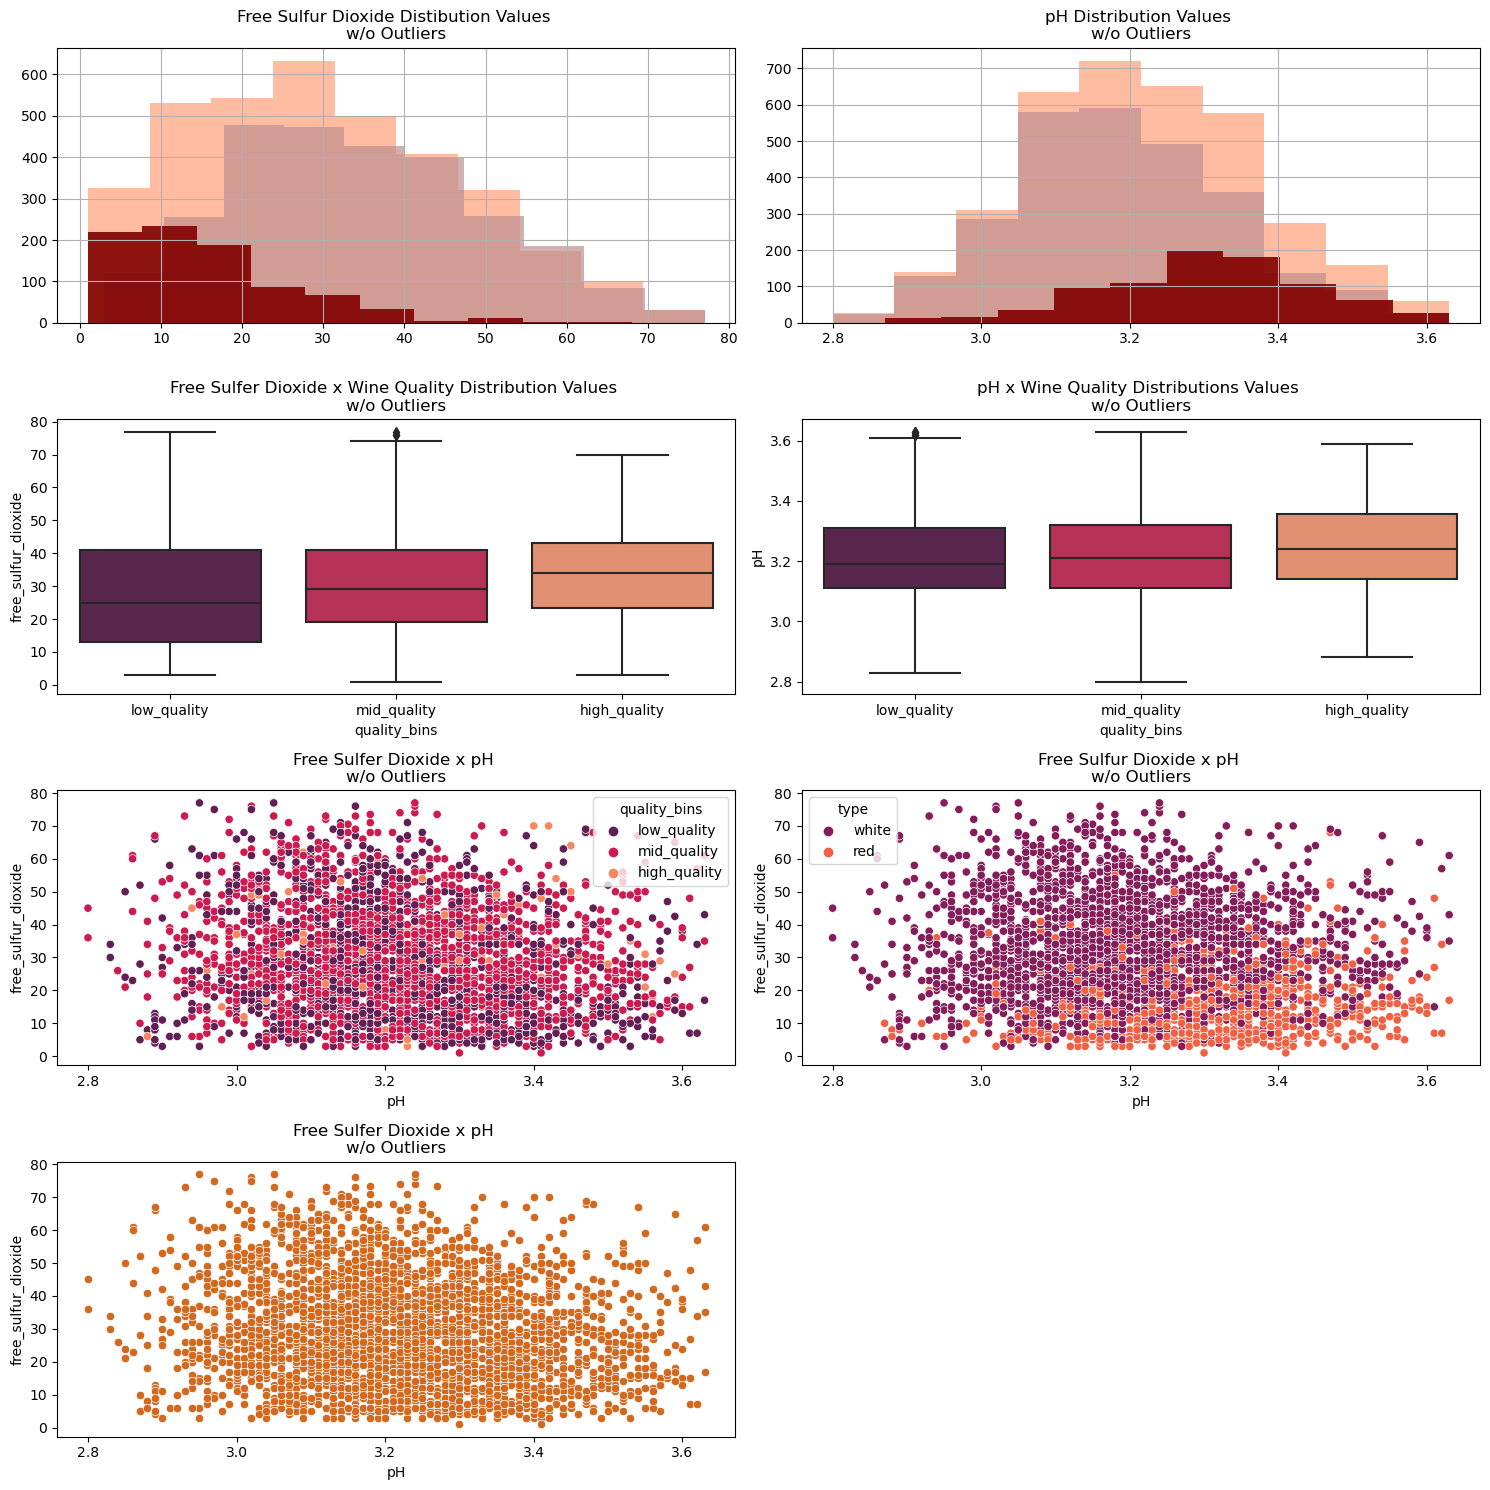

Free Sulfur Dioxide Min Value: 1.0
Free Sulfur Dioxide Max Value: 77.0
--------------------------------------------------
pH Min Value: 2.8
pH Max Value: 3.63


In [43]:
# after removing outliers
plt.figure(figsize=[15,15])
plt.subplot(421)
plt.title('Free Sulfur Dioxide Distibution Values \nw/o Outliers')
train.free_sulfur_dioxide.hist(color='lightsalmon', alpha = 0.7)
plt.subplot(421)
train[train['type']== 'white'].free_sulfur_dioxide.hist(color='rosybrown', alpha = 0.7)
plt.subplot(421)
train[train['type']== 'red'].free_sulfur_dioxide.hist(color='maroon', alpha = 0.9)
plt.subplot(422)
plt.title('pH Distribution Values \nw/o Outliers')
train.pH.hist(color='lightsalmon', alpha = 0.7)
plt.subplot(422)
train[train['type']== 'white'].pH.hist(color='rosybrown', alpha = 0.7)
plt.subplot(422)
train[train['type']== 'red'].pH.hist(color='maroon', alpha = 0.9)
plt.subplot(423)
plt.title('Free Sulfer Dioxide x Wine Quality Distribution Values \nw/o Outliers')
sns.boxplot(data=train, x='quality_bins', y='free_sulfur_dioxide', palette='rocket')
plt.subplot(424)
plt.title('pH x Wine Quality Distributions Values \nw/o Outliers')
sns.boxplot(data=train, x='quality_bins', y='pH', palette='rocket')
plt.subplot(425)
plt.title('Free Sulfer Dioxide x pH \nw/o Outliers')
sns.scatterplot(data=train, x='pH', y='free_sulfur_dioxide', hue='quality_bins', palette='rocket')
plt.subplot(426)
plt.title('Free Sulfur Dioxide x pH \nw/o Outliers')
sns.scatterplot(data=train, x='pH', y='free_sulfur_dioxide', hue='type', palette='rocket')
plt.subplot(427)
plt.title('Free Sulfer Dioxide x pH \nw/o Outliers')
sns.scatterplot(data=train, x='pH', y='free_sulfur_dioxide', color='chocolate')
plt.tight_layout()
plt.show()

# min and max values for free sulfur dioxide and pH
print(f'Free Sulfur Dioxide Min Value: {train.free_sulfur_dioxide.min()}')
print(f'Free Sulfur Dioxide Max Value: {train.free_sulfur_dioxide.max()}')
print('-'*50)
print(f'pH Min Value: {train.pH.min()}')
print(f'pH Max Value: {train.pH.max()}')

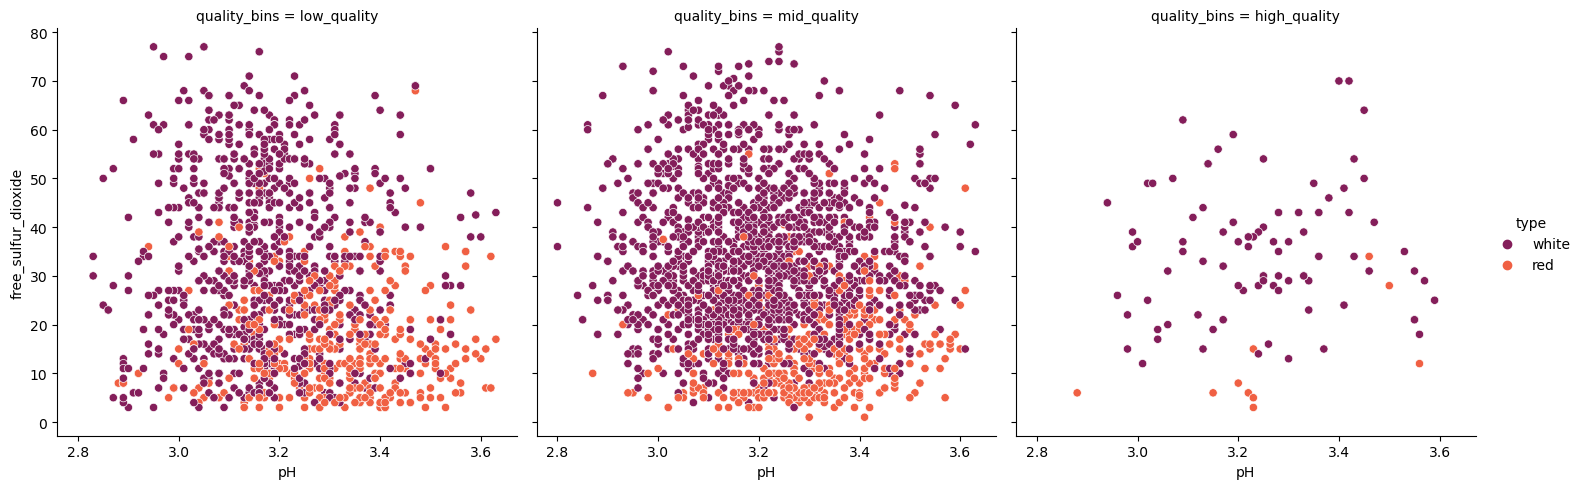

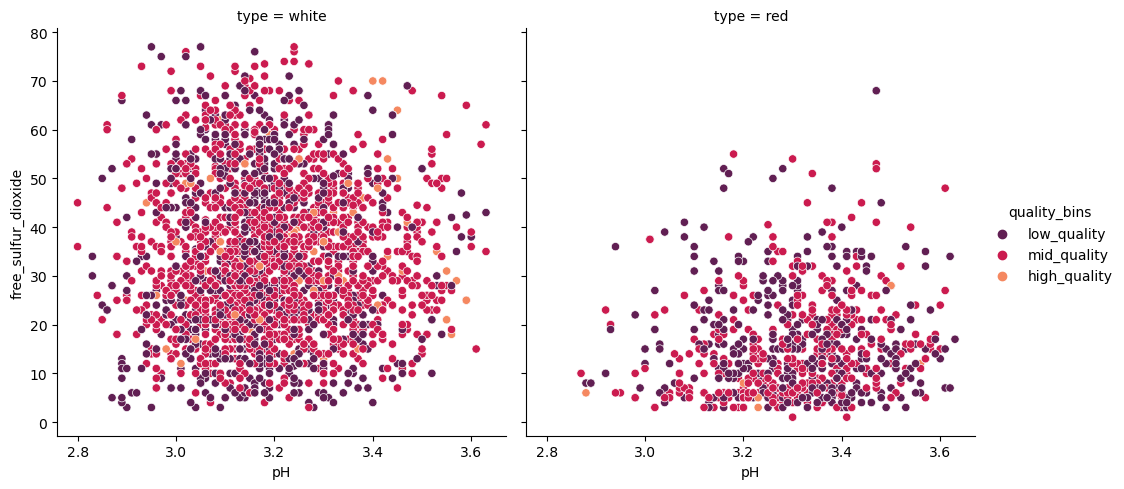

In [46]:
sns.relplot(data=train, x='pH', y='free_sulfur_dioxide', col='quality_bins', hue='type', palette='rocket')
sns.relplot(data=train, x='pH', y='free_sulfur_dioxide', col='type', hue='quality_bins', palette='rocket')
plt.show()

In [47]:
# cross tab of free sulfur dioxide x pH
observed = pd.crosstab(train.free_sulfur_dioxide, train.pH)
# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)
# hypothesis statement
if p < α:
    print(f'We reject the null hypothesis. With p value: {p:.4f}, there is enough evidence to support a statistical relationship between Free Sulfur Dioxide quality and pH.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p:.4f}, this is not enough evidence to support a statistical relationship between Free Sulfur Dioxide quality and pH')

We reject the null hypothesis. With p value: 0.0000, there is enough evidence to support a statistical relationship between Free Sulfur Dioxide quality and pH.


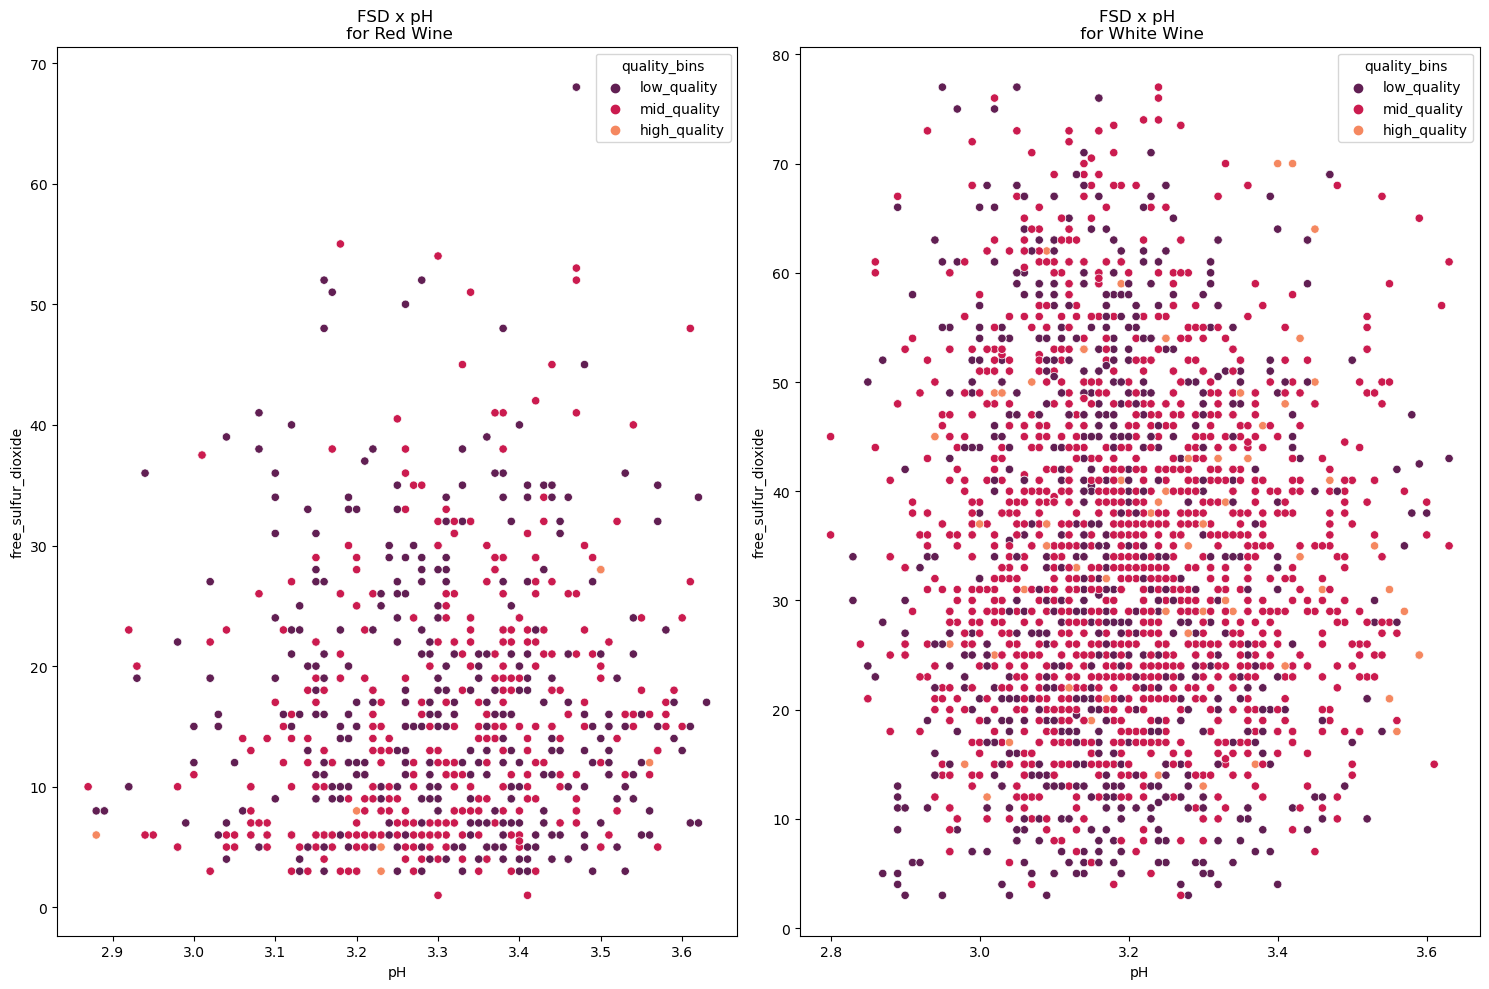

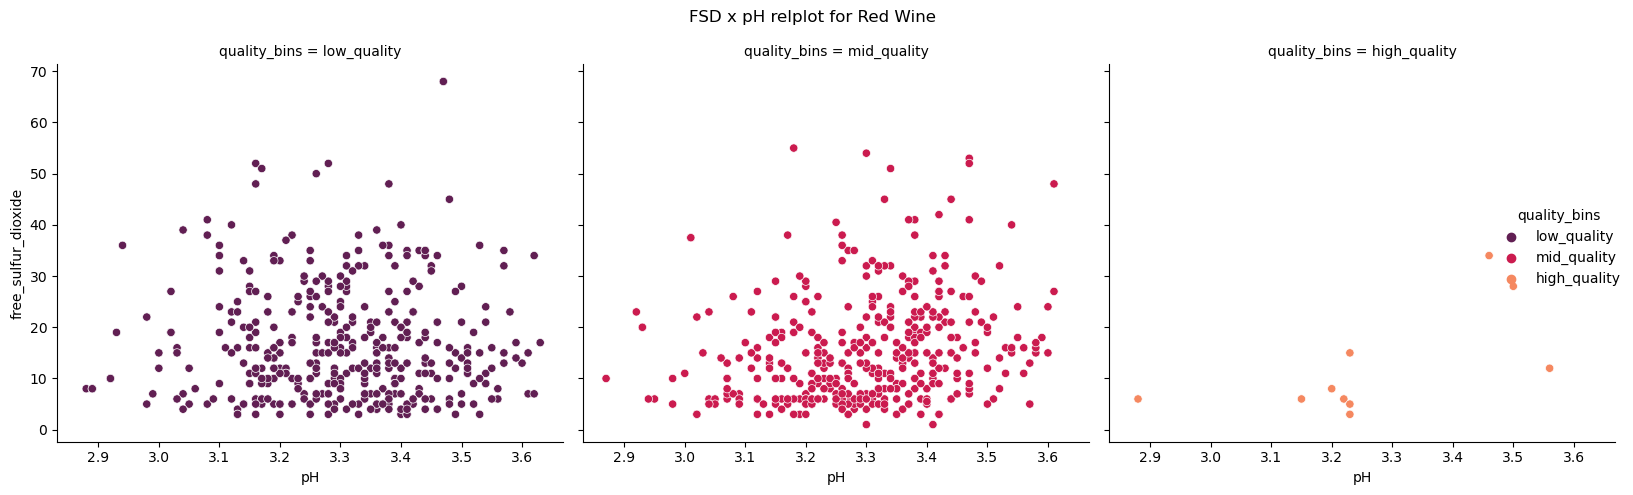

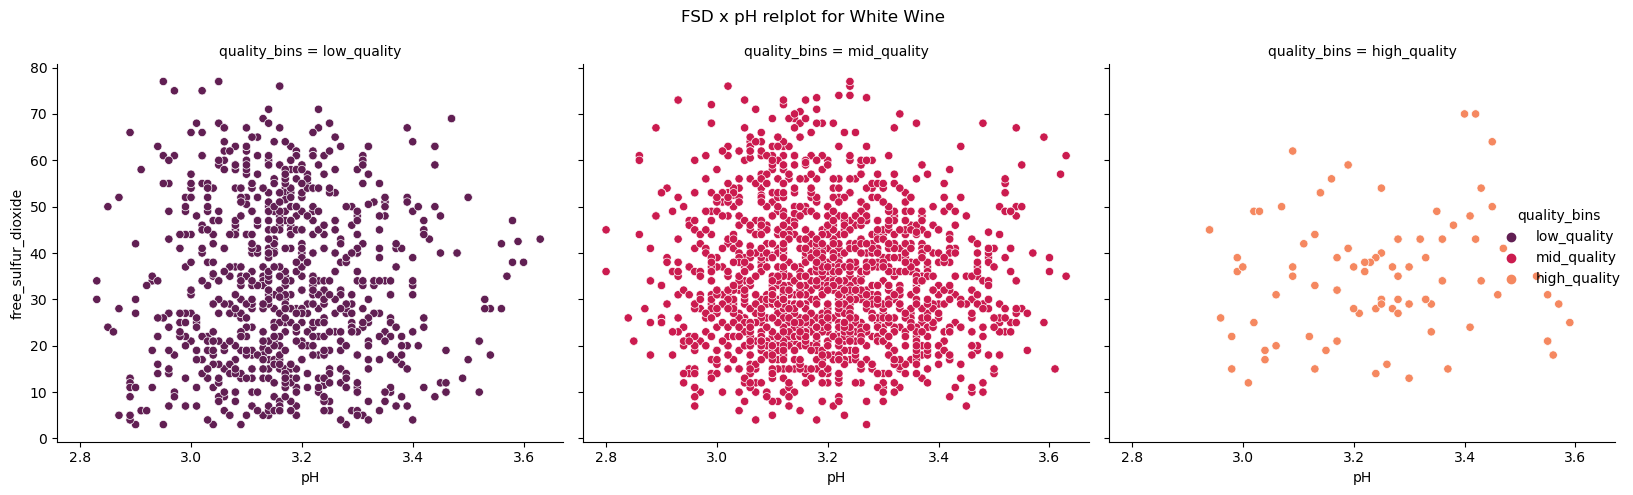

In [64]:
# graphs for red and white wine individually
plt.figure(figsize=[15,10])
plt.subplot(121)
plt.title('FSD x pH \n for Red Wine')
sns.scatterplot(data=train[train['type'] == 'red'], x='pH', y='free_sulfur_dioxide', hue='quality_bins', palette='rocket')
plt.subplot(122)
plt.title('FSD x pH \n for White Wine')
sns.scatterplot(data=train[train['type'] == 'white'], x='pH', y='free_sulfur_dioxide', hue='quality_bins', palette='rocket')
plt.tight_layout()
rel = sns.relplot(data=train[train['type'] == 'red'], x='pH', y='free_sulfur_dioxide', col='quality_bins', hue='quality_bins', palette='rocket')
rel.fig.suptitle('FSD x pH relplot for Red Wine')
plt.tight_layout()
rel1 = sns.relplot(data=train[train['type'] == 'white'], x='pH', y='free_sulfur_dioxide', col='quality_bins', hue='quality_bins', palette='rocket')
rel1.fig.suptitle('FSD x pH relplot for White Wine')
plt.tight_layout()
plt.show()

##### Take aways
- White wines do not seem to have a clear correlation between free sulfur dioxide, pH, and quality.
- Larger pH range for red wine
- Larger FSD range for white wine

In [65]:
# hypothesis test for red wine free sulfur dioxide x pH
# red wine cross tab
observed_red = pd.crosstab(train[train['type']=='red'].free_sulfur_dioxide, train[train['type']=='red'].pH)
# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed_red)
# hypothesis statement
if p < α:
    print(f'We reject the null hypothesis. With p value: {p:.4f}, there is enough evidence to support a statistical relationship between red wine free sulfur dioxide and pH.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p:.4f}, this is not enough evidence to support a statistical relationship between red wine free sulfur dioxide and pH')

We reject the null hypothesis. With p value: 0.0000, there is enough evidence to support a statistical relationship between red wine free sulfur dioxide and pH.


In [66]:
# hypothesis test for white wine free sulfur dioxide x pH
# white wine cross tab
observed_w = pd.crosstab(train[train['type']=='white'].free_sulfur_dioxide, train[train['type']=='white'].pH)
# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed_w)
# hypothesis statement
if p < α:
    print(f'We reject the null hypothesis. With p value: {p:.4f}, there is enough evidence to support a statistical relationship between white wine free sulfur dioxide and pH.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p:.4f}, this is not enough evidence to support a statistical relationship between white wine free sulfur dioxide and pH')

We reject the null hypothesis. With p value: 0.0000, there is enough evidence to support a statistical relationship between white wine free sulfur dioxide and pH.


__Low Quality Wine x FSD x pH__

H$_0$: There is no relation between low quality wine, pH, and sulfer dioxide.

H$_a$: There is a relation between low quality wine, pH, and sulfer dioxide.

In [74]:
# low quality x FSD x ph
# assign variables for pearsons r
x = train[train['quality_bins'] == 'low_quality'].free_sulfur_dioxide
y = train[train['quality_bins'] == 'low_quality'].pH
# do the thing
corr, p = stats.pearsonr(x,y)
# print corr and p
print(f'p-Value: {p}')
print('-'*50)
print(f'corr Value: {corr}')
print('-'*50)
# hypothesis statement
if p < α:
    print(f'We reject the null hypothesis. With p value: {p:.4f}, there is enough evidence to support a statistical relationship between low quality wine, free sulfur dioxide, and pH.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p:.4f}, this is not enough evidence to support a statistical relationship between low quality wine, free sulfur dioxide, and pH.')

p-Value: 8.300087897572575e-11
--------------------------------------------------
corr Value: -0.1785875020461815
--------------------------------------------------
We reject the null hypothesis. With p value: 0.0000, there is enough evidence to support a statistical relationship between low quality wine, free sulfur dioxide, and pH.


__Take away__: 
The relationship between free dulfur dioxide, pH, and low quality wine is significant, but does not have a strong correlation.

__Mid Quality Wine x FSD x pH__

H$_0$: There is no relation between mid quality wine, pH, and sulfer dioxide.

H$_a$: There is a relation between mid quality wine, pH, and sulfer dioxide.

In [76]:
# mid quality x FSD x ph
# assign variables for pearsons r
x = train[train['quality_bins'] == 'mid_quality'].free_sulfur_dioxide
y = train[train['quality_bins'] == 'mid_quality'].pH
# do the thing
corr, p = stats.pearsonr(x,y)
# print corr and p
print(f'p-Value: {p}')
print('-'*50)
print(f'corr Value: {corr}')
print('-'*50)
# hypothesis statement
if p < α:
    print(f'We reject the null hypothesis. With p value: {p:.4f}, there is enough evidence to support a statistical relationship between mid quality wine, free sulfur dioxide, and pH.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p:.4f}, this is not enough evidence to support a statistical relationship between mid quality wine, free sulfur dioxide, and pH.')

p-Value: 3.271299687615029e-10
--------------------------------------------------
corr Value: -0.1350106630274664
--------------------------------------------------
We reject the null hypothesis. With p value: 0.0000, there is enough evidence to support a statistical relationship between mid quality wine, free sulfur dioxide, and pH.


__Take away__: 
The relationship between free dulfur dioxide, pH, and MID quality wine is significant, but does not have a strong correlation.

__High Quality Wine x FSD x pH__

H$_0$: There is no relation between high quality wine, pH, and sulfer dioxide.

H$_a$: There is a relation between high quality wine, pH, and sulfer dioxide.

In [78]:
# high quality x FSD x ph
# assign variables for pearsons r
x = train[train['quality_bins'] == 'high_quality'].free_sulfur_dioxide
y = train[train['quality_bins'] == 'high_quality'].pH
# do the thing
corr, p = stats.pearsonr(x,y)
# print corr and p
print(f'p-Value: {p}')
print('-'*50)
print(f'corr Value: {corr}')
print('-'*50)
# hypothesis statement
if p < α:
    print(f'We reject the null hypothesis. With p value: {p:.4f}, there is enough evidence to support a statistical relationship between high quality wine, free sulfur dioxide, and pH.')
else:
    print(f'We fail to reject the null hypothesis. With p value: {p:.4f}, this is not enough evidence to support a statistical relationship between high quality wine, free sulfur dioxide, and pH.')

p-Value: 0.5703994463345325
--------------------------------------------------
corr Value: 0.055467988039777816
--------------------------------------------------
We fail to reject the null hypothesis. With p value: 0.5704, this is not enough evidence to support a statistical relationship between high quality wine, free sulfur dioxide, and pH.


__Take away__: 
The relationship between free dulfur dioxide, pH, and MID quality wine is NOT significant and does not have a strong correlation.

#### Take aways
Free sulfur dioxide and pH have a significant relationship to low and mid quality wines but do not have a significant relationship to high quality wines.

    - The dataset for high quality wines is small. I wonder if we need more data to see a significant relationship.
    
    - There may be a relationship to FSD, pH, high wine quality and wine type.